✅ 데이터 필드 구성
Pregnancies : 임신횟수 
Glucose : 포도당 수치 (높을수록 당뇨 위험 증가) 
BloodPressure : 혈압 (높을수록 당뇨 위험 증가)
SkinThickness : 피부 두께
Insulin : 인슐린 수치
BMI : 체질량지수(비만 여부와 당뇨 관련)
DiabetesPedigreeFunction : 당뇨 유전력 지수
Age : 나이(일반적으로 나이가 많을수록 당뇨 발병 위험이 높아짐)
Outcome : 당뇨 유무 결과(0 = 비당뇨, 1 = 당뇨 환자) 

✅ 포인트
Glucose, BMI, Age, Insulin 등은 당뇨병 예측에 핵심적인 연속형 변수입 
Outcome 예측하려는 타겟 변수이며, 2진 분류 문제 (당뇨 / 비당뇨)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("diabetes.csv")

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

✅ 예측하고 싶은 값(당뇨인지 아닌지)과 예측에 사용할 데이터(나이, 혈당, BMI 등)분리
'Outcome'열 제외한 나머지를 입력데이터 X로 저장 
예측하고싶은 값 'Outcome' 열을 따로 y로 저장 (0: 당뇨없음, 1: 당뇨있)

In [5]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

✅ 전체 데이터 80% 훈련용, 20% 테스트용, 결과 재현 위해 random_state=42 고정 
전체 데이터 수 = 768명, 훈련 데이터 (X_train, y_train) = 614명, 테스트 데이터 (X_test, y_test) = 154명

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(random_state=42, max_depth=4)  # max_depth는 하이퍼파라미터 조정 가능

✅ X_train = 문제지(혈당, 체중, 나이 등) 
y_train = 정답지(당뇨인지 아닌지 (0 또는 1) 
이런 건강 정보일 땐 당뇨가 있어~" 같은 패턴을 스스로 학습/공부시킴

In [39]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

✅처음 보는 시험 문제(X_test) 주고, 예측한 결과(답안지) y_pred 저장

In [43]:
y_pred = tree.predict(X_test)

✅ 트리모델이 낸 예측값(y_pred) + 실제 정답값(y_test) 비교&결과 -> 평가 
혼동 행렬(Confusion Matrix): 실제 정답값과 트리가 낸 예측값을 비교해서 얼마나 맞췄고, 어디서 틀렸는지 보여줌
분류 리포트(Classification Report): 밀도(precision), 재현율(recall), F1점수
정확도(Accuracy): 전체 중 몇 개나 맞췄는지 퍼센트

| 실제값 → 예측값 | 예측: 0 (비당뇨) | 예측: 1 (당뇨) |
|------------------|------------------|----------------|
| 실제: 0 (비당뇨) |       86         |       0        |
| 실제: 1 (당뇨)   |        0         |      68        |

In [47]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[86  0]
 [ 0 68]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        68

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

Accuracy Score: 1.0


In [ ]:
✅ 그래프(트리 그림) 크기 : 가로 20, 세로 10 설정 
plot_tree : 실제 트리 구조 그리
feature_names : 어떤 특성(컬럼 이름) ( Glucose, Age 등) 
class_names: 예측 결과가 어떤 클래스인지 ("당뇨 아님", "당뇨") 
plt.title : 제목 설정

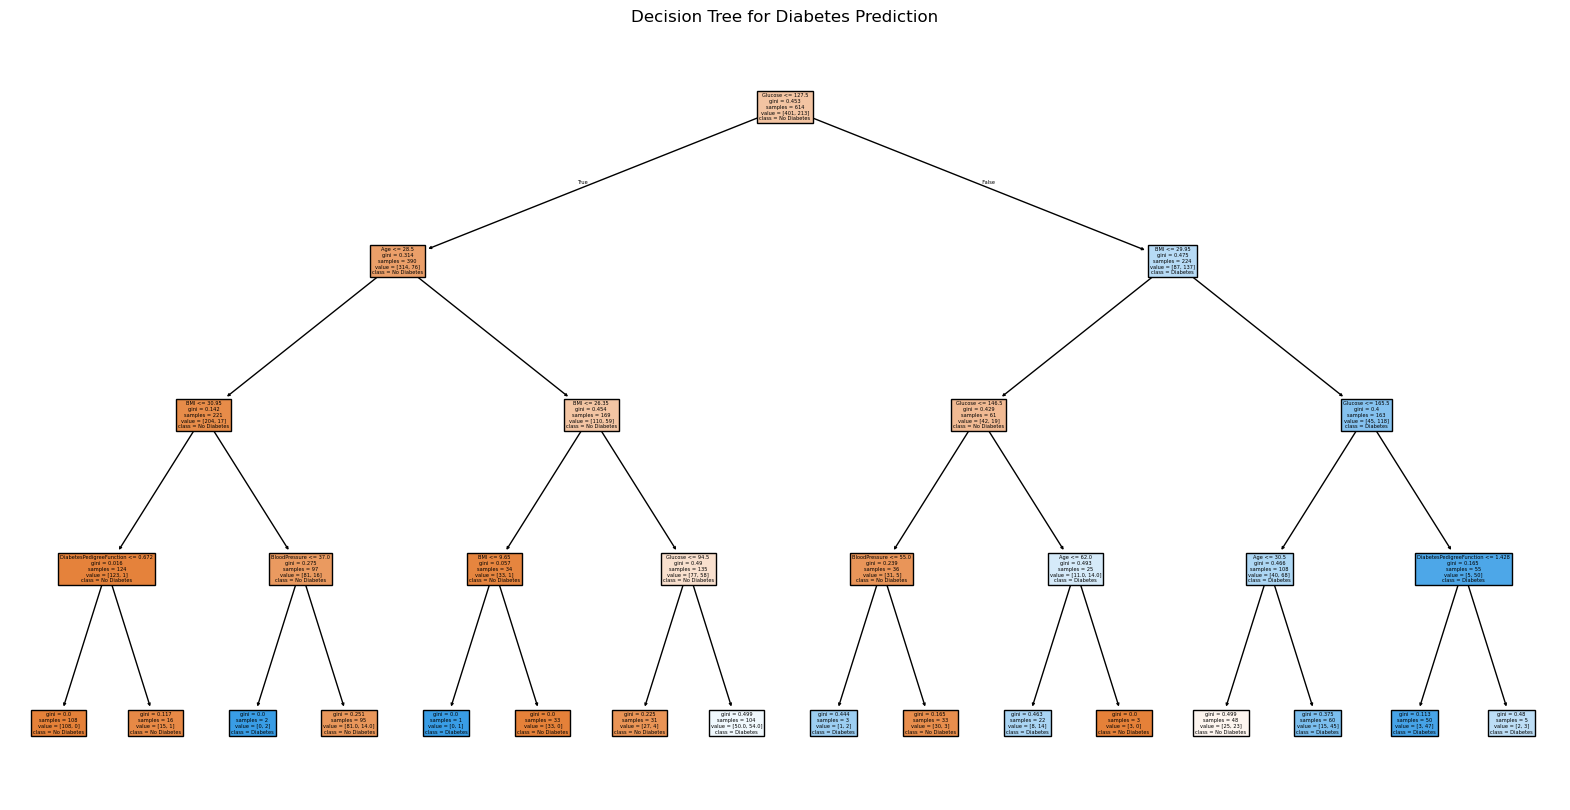

In [49]:
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.title("Decision Tree for Diabetes Prediction")
plt.show()